<a href="https://colab.research.google.com/github/Kawakaze-51/Regression-model/blob/main/Support_Vector_Regression_(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

## Feature Scaling

In [ ]:
np.set_printoptions(precision=0)
Y = Y.reshape(len(Y),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.]])

## Visualising the SVR results

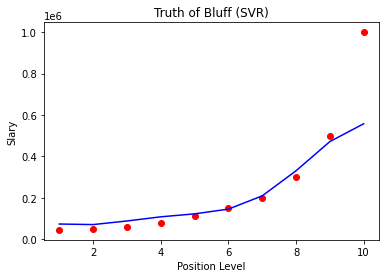

In [ ]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth of Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Slary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

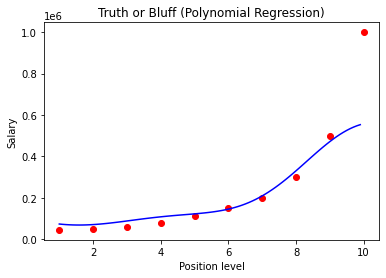

In [ ]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()